In [16]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.activations import relu, selu, gelu
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Reshape, Flatten
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Some-Usefull-Machine-Learning-Stuff/blob/main/HW/Lecture_Notes/W6564-LSTM_TS.ipynb)


In [2]:
def download_data():  ### This dude will download the dataset from the directory directly!
  import requests
  url = "https://raw.githubusercontent.com/y-akbal/Some-Usefull-Machine-Learning-Stuff/main/HW/Lecture_Notes/data.csv"
  res = requests.get(url, allow_redirects=True)
  with open('data.csv','wb') as file:
    file.write(res.content)

download_data()     
os.listdir()
os.path.exists("data.csv")

True

In [4]:
X = pd.read_csv("data.csv").iloc[:, -1]

In [10]:
X = X[5000:]  ### pandas series

In [19]:
data = (X - X.mean())/X.std()

In [21]:
data

5000     1.408840
5001     1.563722
5002     1.563722
5003     1.563722
5004     1.532746
           ...   
57211    1.343789
57212    1.497123
57213    1.483183
57214    1.520355
57215    1.235371
Name: Toplam (MWh), Length: 52216, dtype: float64

In [152]:
import scipy
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 

In [154]:
raw_data = pd.read_csv("data.csv").iloc[:, -1]

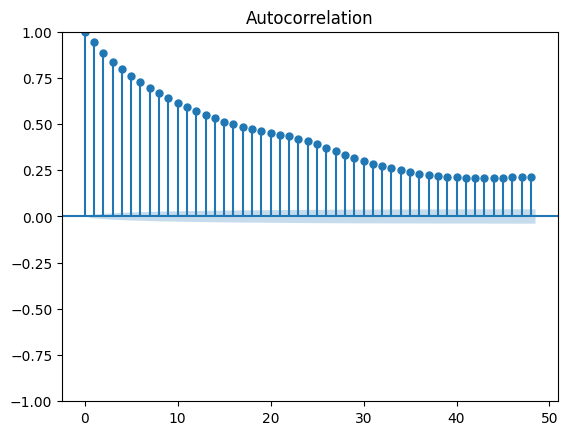

In [158]:
plot_acf(raw_data);

In [159]:
def sliding_window(data, window_size = 150):
  data = np.array(data)
  N = len(data)
  X = []
  y = []
  for i in range(N-1-window_size):
    X.append(data[i:i+window_size])
    y.append(data[i+window_size])
  return np.array(X), np.array(y)

In [160]:
X, y = sliding_window(data)

In [161]:
alpha = 0.8
N = len(data)
cut_off = int(alpha*N)
X_train, y_train = sliding_window(data[:cut_off])
X_test, y_test = sliding_window(data[cut_off:])

In [162]:
###1) Normalize the data
### 2) prepare sliding window function
###3) split the data
### This problem is a regression prblem 


In [163]:
from tensorflow.keras.layers import LSTM, GRU, RNN

In [164]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)


In [165]:
y_train = np.expand_dims(y_train, -1)
y_test = np.expand_dims(y_test, -1)

In [166]:
model = Sequential([LSTM(150,  ),
                    
                   Dense(1)])

In [167]:
model.compile(loss = "mse", optimizer = "sgd")

In [168]:
model.fit(X_train, y_train, batch_size = 32, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
1301/1301 [==============================] - 14s 10ms/step - loss: 0.1799 - val_loss: 0.1467
Epoch 2/10
1301/1301 [==============================] - 12s 9ms/step - loss: 0.1413 - val_loss: 0.1337
Epoch 3/10
1301/1301 [==============================] - 13s 10ms/step - loss: 0.1319 - val_loss: 0.1279
Epoch 4/10
1301/1301 [==============================] - 12s 9ms/step - loss: 0.1272 - val_loss: 0.1252
Epoch 5/10
1301/1301 [==============================] - 12s 9ms/step - loss: 0.1241 - val_loss: 0.1243
Epoch 6/10
1301/1301 [==============================] - 12s 9ms/step - loss: 0.1219 - val_loss: 0.1216
Epoch 7/10
1301/1301 [==============================] - 12s 9ms/step - loss: 0.1203 - val_loss: 0.1204
Epoch 8/10
1301/1301 [==============================] - 12s 9ms/step - loss: 0.1190 - val_loss: 0.1192
Epoch 9/10
1301/1301 [==============================] - 12s 9ms/step - loss: 0.1180 - val_loss: 0.1185
Epoch 10/10
1301/1301 [==============================] - 12s 9ms/step -

In [169]:
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1)

322/322 [==============================] - 2s 5ms/step


In [170]:
y_pred = y_pred.reshape(-1)

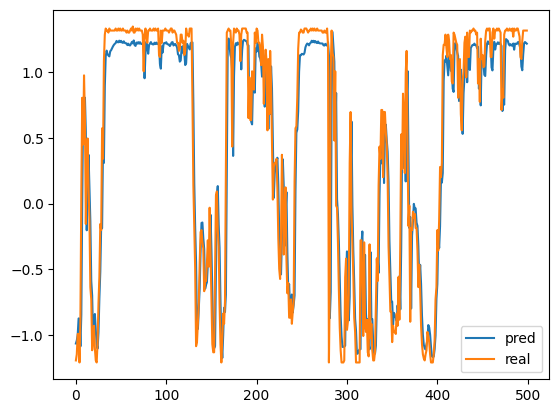

In [171]:
plt.plot(y_pred[:500], label = "pred")
plt.plot(y_test[:500], label = "real")
plt.legend()
plt.show()

In [172]:
from sklearn.metrics import r2_score

In [173]:
r2_score(y_test, y_pred)

0.8890766955261282

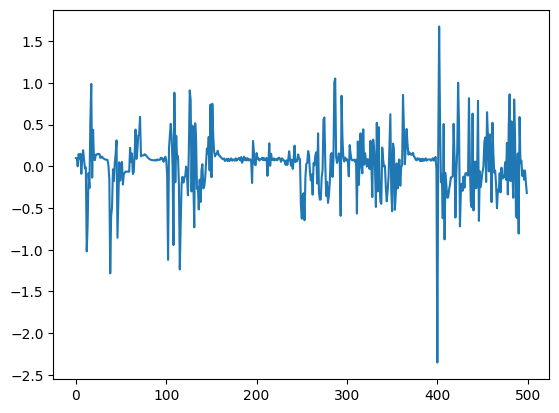

In [127]:
diff = y_test.reshape(-1) - y_pred
plt.plot(diff[:500]) 

In [134]:
from tensorflow.keras.layers import Bidirectional

In [135]:
layer = Bidirectional(LSTM(10))

In [136]:
layer(np.random.randn(1, 25, 1))

<tf.Tensor: shape=(1, 20), dtype=float32, numpy=
array([[ 9.63879065e-05, -7.51525396e-03,  3.04129235e-02,
        -3.30186523e-02,  3.14477412e-03,  3.57777104e-02,
         5.59284836e-02, -2.72431076e-02,  1.28995385e-02,
         7.57691264e-03,  7.54090473e-02, -1.34414688e-01,
        -4.30465005e-02,  1.75753385e-01,  1.41137466e-01,
         2.25090608e-01,  1.35098293e-01,  2.22861186e-01,
         3.89492065e-02,  9.22170579e-02]], dtype=float32)>

In [147]:
model1 = Sequential([LSTM(450, return_sequences = True),
                     LSTM(450),                    
                   Dense(1)])

In [148]:
model1.compile(loss = "mse", optimizer = "adam")

In [149]:
model1.fit(X_train, y_train, batch_size = 32, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
1305/1305 [==============================] - 22s 13ms/step - loss: 0.1239 - val_loss: 0.1153
Epoch 2/10
1305/1305 [==============================] - 16s 12ms/step - loss: 0.1154 - val_loss: 0.1158
Epoch 3/10
1305/1305 [==============================] - 16s 12ms/step - loss: 0.1146 - val_loss: 0.1132
Epoch 4/10
1305/1305 [==============================] - 16s 12ms/step - loss: 0.1136 - val_loss: 0.1151
Epoch 5/10
1305/1305 [==============================] - 16s 12ms/step - loss: 0.1130 - val_loss: 0.1136
Epoch 6/10
1305/1305 [==============================] - 16s 12ms/step - loss: 0.1130 - val_loss: 0.1129
Epoch 7/10
1305/1305 [==============================] - 16s 12ms/step - loss: 0.1123 - val_loss: 0.1147
Epoch 8/10
1305/1305 [==============================] - 17s 13ms/step - loss: 0.1121 - val_loss: 0.1136
Epoch 9/10
1305/1305 [==============================] - 16s 12ms/step - loss: 0.1118 - val_loss: 0.1136
Epoch 10/10
1305/1305 [==============================] - 16s 12m

In [150]:
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1)
r2_score(y_test, y_pred)

326/326 [==============================] - 1s 3ms/step


0.88957409424022